# Demonstracija upotrebe višeslojne neuronske mreže

## Uvod

Umjetne neuronske mreže (engl. Artificial Neural Networks - ANN) predstavljaju jedan od najčešće korištenih modela strojnog učenja za rješavanje (složenih) problema nadgledanog učenja. Ovakvi modeli su sastavljeni od osnovnih gradbenih jedinica koji se nazivaju neuroni. Za demonstraciju upotrebe višeslojne neuronske mreže koristit će se višeslojna mreža čiji neuroni imaju nelinearnu aktivacijsku funkciju odnosno *"MultiLayer Perceptron"* ili skraceno MLP.

Neuronske mreže već i s manjim brojem neurona mogu opisati različite nelinearne odnose između ulaznih veličina i izlazne veličine. Međutim, neuronske mreže imaju i znatno više parametara (težina) koje je potrebno procijeniti nego što je slučaj kod jednostavnijih modela poput linearnog regresijskog modela ili logističke regresije.

Pod pojmom učenje neuronske mreže podrazumijeva se strukturiranje neuronske mreže (odabir broja slojeva, odabir broja neurona u pojedinom sloju, odabir tipa aktivacijske funkcije neurona), a zatim i procjena nepoznatih parametara neuronske mreže, tj. težina mreže. Uz definiranu strukturu neuronske mreže, procjena parametra mreže provodi se minimizacijom odgovarajuće kriterijske funkcije. Optimizacija kriterijskih funkcija provodi se iterativnim numeričkim postupcima koji se zasnivaju na gradijentu kriterijske funkcije. Algoritam s povratnim rasprostiranjem pogreške (engl. backpropagation algorithm) je efikasan algoritam za računanje gradijenta kriterijske funkcije. 

![alternate text](https://jsalatas.ictpro.gr/wp-content/uploads/2011/09/3_3.png "MultiLayer Perceptron s više skrivenih slojeva")

## Izrada modela

Za demonstraciju rada MLP koristit ćemo numpy biblioteku u koju ćemo spremati generirane podatke. Koristit ćemo matplotlib.pyplot biblioteku kako bi nacrtali uzorke te samu krivulju. Procjenit ćemo model koristeći matricu zabune MLP-a.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import scale

Prije deklariranja MLP klasifikatora, generirat ćemo podatke koje ćemo razdvojiti na 70% trening i 30% testnih podataka. Funkcija generate_data(n) prima kao parametar n koja određuje koliko će se podataka generirati. Generirani podatci su 50% klase 0 i 50% klase 1. Podatci se permutiraju kako bi uzorci bili što nasumičniji.

In [2]:
def generate_data(n):
     #prva klasa
    n1 = n/2
    x1_1 = np.random.normal(0.0, 2, (n1,1));
     #x1_1 = .21*(6.*np.random.standard_normal((n1,1)));
    x2_1 = np.power(x1_1,2) + np.random.standard_normal((n1,1));
    y_1 = np.zeros([n1,1])
    temp1 = np.concatenate((x1_1,x2_1,y_1),axis = 1)
    
     #druga klasa
    n2 = n - n/2
    x_2 = np.random.multivariate_normal((0,10), [[0.8,0],[0,1.2]], n2);
    y_2 = np.ones([n2,1])
    temp2 = np.concatenate((x_2,y_2),axis = 1)
    
    data = np.concatenate((temp1,temp2),axis = 0)
    
     #permutiraj podatke
    indices = np.random.permutation(n)
    data = data[indices,:]
    
    return data

In [3]:
np.random.seed(12)
data=generate_data(1000)
dataTrain=data[0:int(np.floor(len(data)*0.7))]
dataTest=data[int(np.floor(len(data)*0.7)):]

Kako bi model bio što uspješniji pri procjeni krivulje odluke potrebno je skalirati podatke što također i smanjuje broj iteracija koje su potrebne.

In [4]:
TrainS=scale(dataTrain[:,0:2])
TestS=scale(dataTest[:,0:2])

Nakon što imamo trening i testni skup možemo napraviti MLP klasifikator. Koristit ćemo MLP s 3 neurona po sloju i 10 skrivenih slojeva. Potrebno je i predati najveći broj iteracija. Ovdje je odabrado 800 iteracija. Također je odabrana i stohastička funkcija kao aktivacijska funkcija. Nakon deklaracije klasifikatora možemo ga trenirati nad skaliranim skupom. Nakon treninga možemo koristiti klasifikator za predviđanje ostalih vrijednosti.

In [5]:
ANN=MLPClassifier(hidden_layer_sizes=(3,10), max_iter=800, activation='logistic')
ANN.fit(TrainS, dataTrain[:,2])
y_predicted=ANN.predict(TestS)

## Vrednovanje modela

Najjednostavnije vrednovanje modela možemo dobiti putem matrice zabune koja nam prikazuje koliko je točno i koliko je netočno klasificiranih primjera testnog skupa koja je prikazana na slici dolje:

![alternate text](https://docs.wso2.com/download/attachments/47520050/Binary_Classification_Matrix_Definition.png?version=1&modificationDate=1441305071000&api=v2)

Dodatni pokazatelji klasifikacijskog modela koji se izračunavaju pomoću matrice zabune:
$$Točnost=\frac{TP+TN}{TP+TN+FP+FN} \\$$

$$Učestalost pogrešne klasifikacije= 1 - Točnost\\$$
 
$$Preciznost=\frac{TP}{TP+FP}\\$$
 
$$Odziv=\frac{TP}{TP+FN}\\$$

$$Specifičnost=\frac{TN}{TN+FP}\\$$

Izračunat ćemo matricu zabune, prikazati ju te ispisati dodatne pokazatelje putem funkcije evaluateModel(cM)

In [6]:
def plot_confusion_matrix(c_matrix):
    norm_conf = []
    for i in c_matrix:
        a = 0
        tmp_arr = []
        a = sum(i, 0)
        for j in i:
            tmp_arr.append(float(j)/float(a))
        norm_conf.append(tmp_arr)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    res = ax.imshow(np.array(norm_conf), cmap=plt.cm.Greys, interpolation='nearest') 
 
    width = len(c_matrix)
    height = len(c_matrix[0]) 
 
    for x in xrange(width):
        for y in xrange(height):
            ax.annotate(str(c_matrix[x][y]), xy=(y, x),
                        horizontalalignment='center',
                        verticalalignment='center', color = 'green', size = 20)

In [7]:
def evaluateModel(cM):
    #racunanje pokazatelja klas. modela
    suma=np.sum(cM)
    temp=np.array([float(cM[0,0]+cM[1,1])/suma,
                   1-float(cM[0,0]+cM[1,1])/suma,
                    float(cM[0,0])/(np.sum(cM[0])),
                    float(cM[0,0])/(np.sum(cM[:,0])),
                    float(cM[1,1])/(np.sum(cM[:,1]))
                   ])
    return temp*100

Tocnost:  97.6666666667 %
Ucestalost pogresne klasifikacije:  2.33333333333 %
Preciznost:  98.0 %
Odziv:  97.3509933775 %
Specificnost:  97.9865771812 %


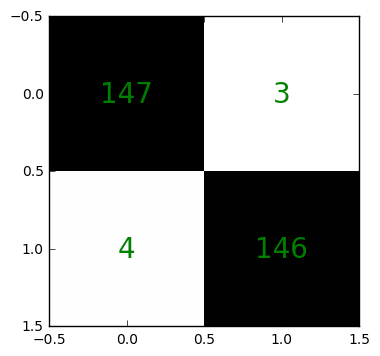

In [8]:
matrix=confusion_matrix(dataTest[:,2],y_predicted)

%matplotlib inline
plot_confusion_matrix(matrix)

ParamEval=evaluateModel(matrix)
print "Tocnost: ", ParamEval[0], "%"
print "Ucestalost pogresne klasifikacije: " , ParamEval[1], "%"
print "Preciznost: ",  ParamEval[2], "%"
print "Odziv: ",  ParamEval[3], "%"
print "Specificnost: ",  ParamEval[4], "%"

Prema podatcima koje vidimo gore, vidimo da je klasifikator odredio granicu odluke zadovoljavauće. Ispravno klasificirani podatci se nalaze u crnim kvadratima dok krivo klasificirani podatci se nalaze u bijelim poljima. Od 300 uzoraka samo je 9 krivo klasificirano što je 97% točnosti. Idući korak je vizualizirati krivulju odluke zajedno s korištenim testnim podatcima. Koristit ćemo funkciju plotDecisionCurve koja prima nekoliko parametara: estimator odnosno model prediktora, naslov grafa, x podatke, y podatke i jeli potrebno te podatke prilagoditi dodavajući polinomne osobine. Polinomne osobine za MLP nam nije potreban. Funkcija pravi 2D mrežu te uz pomoć te mreže crta krivulju pomoću naredbe contourf. Također površinu iznad krivulje crta jednom bojom a površinu ispod drugom.

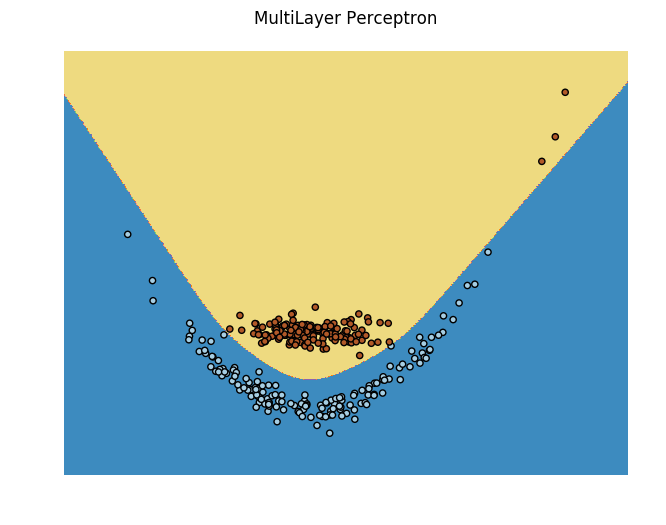

In [9]:
def plotDecisionCurve(estimator, naslov,x,y, polyFeaturesRequired=False):
    h=.02
    x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    if polyFeaturesRequired==True:
        coeff=poly.fit_transform(np.c_[xx.ravel(),yy.ravel()])
    else:
        coeff=np.c_[xx.ravel(), yy.ravel()]
    fig, ax = plt.subplots(figsize=(8, 6))
    Z = estimator.predict(coeff)
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.axis('off')
    ax.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.Paired)
    ax.set_title(naslov)
    
plotDecisionCurve(ANN, 'MultiLayer Perceptron',TestS[:,0:2],y_predicted)

## Testiranje modela

Naravno da promjenom aktivacijske funkcije i promjenom broja skrivenih slojeva i broja neurona po sloju mijenjamo i tocnost odnosno preciznost samog modela. Ovdje ćemo promotriti kako promjena slojeva i broja neurona utjeće na model uz konstantnu sigmoidnu aktivacijsku funkciju. Prije razmatranja drugih modela dolje su prikazani parametri demonstriranog modela u prijasnjem podpoglavlju.

In [10]:
print ANN.get_params

<bound method MLPClassifier.get_params of MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3, 10), learning_rate='constant',
       learning_rate_init=0.001, max_iter=800, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)>


Promotrimo idući grafički prikaz granice odluke ukoliko se smanji broj skrivenih slojeva sa 10 na 1.

C:\Users\marko\Anaconda2\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


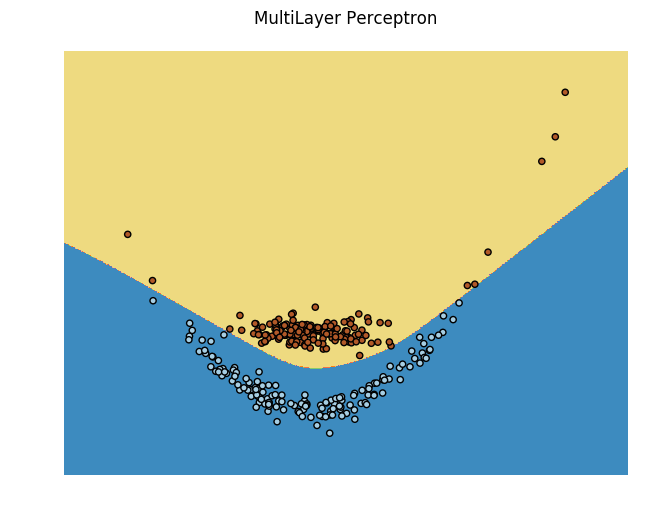

In [11]:
ANN=MLPClassifier(hidden_layer_sizes=(3,2), max_iter=800, activation='logistic')
ANN.fit(TrainS, dataTrain[:,2])
y_predicted=ANN.predict(TestS)
plotDecisionCurve(ANN, 'MultiLayer Perceptron',TestS[:,0:2],y_predicted)

Kao što se vidi iz slike gore, MLP pokušava odvojiti podatke praktički pravcem jer nema dovoljno skrivenih slojeva koji bi tu krivulju prilagodili podatcima. Također smo dobili i upozorenje da minimum funkcije nije pronađen čak uz 800 iteracija što je za prijašnji model bilo dovoljno. Matrica zabune ovakvog sustava kao i dodatni pokazatelji sustava su prikazani dolje.

Tocnost:  96.3333333333 %
Ucestalost pogresne klasifikacije:  3.66666666667 %
Preciznost:  94.6666666667 %
Odziv:  97.9310344828 %
Specificnost:  94.8387096774 %


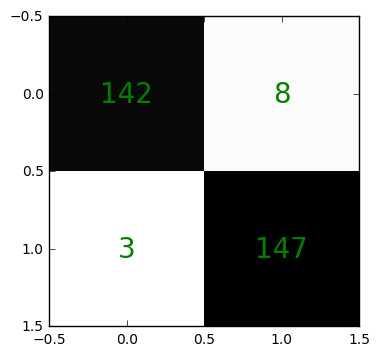

In [12]:
matrix=confusion_matrix(dataTest[:,2],y_predicted)
plot_confusion_matrix(matrix)

ParamEval=evaluateModel(matrix)
print "Tocnost: ", ParamEval[0], "%"
print "Ucestalost pogresne klasifikacije: " , ParamEval[1], "%"
print "Preciznost: ",  ParamEval[2], "%"
print "Odziv: ",  ParamEval[3], "%"
print "Specificnost: ",  ParamEval[4], "%"

Iz prikaza matrice zabune možemo vidjeti da krivo klasificiranih podataka kao klasa 1 ima samo jedan što je manje nego originalni model ali zato krivo klasificiranih podataka kao klasa 0 ima puno više. U idućem primjeru čemo prikazati MLP sa 10 skrivenih slojeva ali ovaj put samo sa jednim neuronom po sloju.

Tocnost:  38.0 %
Ucestalost pogresne klasifikacije:  62.0 %
Preciznost:  76.0 %
Odziv:  43.1818181818 %
Specificnost:  0.0 %


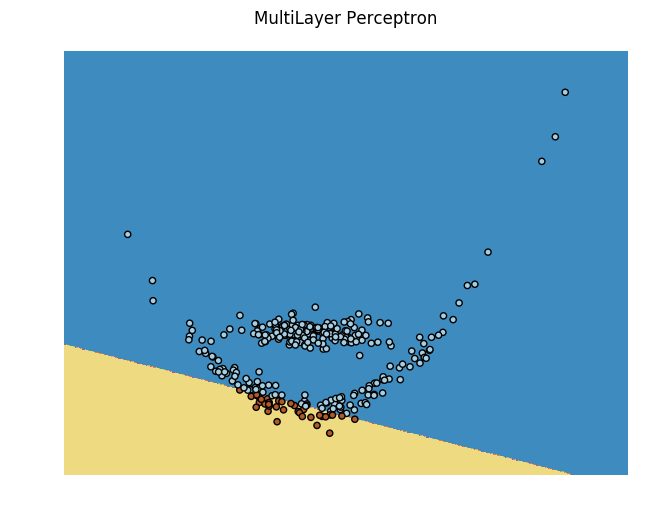

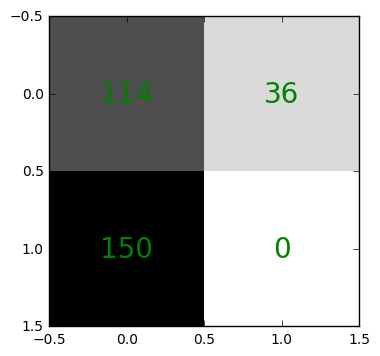

In [13]:
ANN=MLPClassifier(hidden_layer_sizes=(1,10), max_iter=800, activation='logistic')
ANN.fit(TrainS, dataTrain[:,2])
y_predicted=ANN.predict(TestS)
plotDecisionCurve(ANN, 'MultiLayer Perceptron',TestS[:,0:2],y_predicted)
matrix=confusion_matrix(dataTest[:,2],y_predicted)
plot_confusion_matrix(matrix)

ParamEval=evaluateModel(matrix)
print "Tocnost: ", ParamEval[0], "%"
print "Ucestalost pogresne klasifikacije: " , ParamEval[1], "%"
print "Preciznost: ",  ParamEval[2], "%"
print "Odziv: ",  ParamEval[3], "%"
print "Specificnost: ",  ParamEval[4], "%"

U ovom primjeru vidimo da je lošiji od primjera gdje smo smanjili broj skrivenih slojeva. Razlog toga je što se promjenom broja neurno smanjuje broj težinskih funkcija puno brže nego promjenom broja skrivenih slojeva. Prema matrici zabune možemo vidjeti da niti jedan podatak klase 0 nije ispravno klasificiran. MLP model je zbog nedostatka neurona pokušao odvojiti podatke linearnom funkcijom.

## Usporedba MLP sa logističkom regresijom

Logistička regresija je linearni klasifikator koji pokušava optimalno postaviti pravac kako bi odijelio klasu 0 od klase 1. Pošto je ona linearna a trenutni podatci su nelinearni moramo dodati polinomne osobine trening i testnim podatcima. Moramo i dodati dodatne biblioteke.

In [14]:
import sklearn.linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

Prilikom izrade modela logističke regresije, potrebno je postaviti maksimalan broj iteracija na 800. Također moramo trening i testni skup prilagoditi kako bi model mogao ispravno odraditi klasifikaciju.

In [15]:
logRegress=lm.LogisticRegression(max_iter=800)
poly=PolynomialFeatures(degree=2,include_bias=False)
polyTrain=poly.fit_transform(dataTrain[:,0:2])
polyTest=poly.fit_transform(dataTest[:,0:2])
logRegress.fit(polyTrain,dataTrain[:,2])
y_predictedRegress=logRegress.predict(polyTest)

Na idućim slikama prikazana su svojstva klasifikatora kao što smo to učinili za MLP.

Tocnost:  99.3333333333 %
Ucestalost pogresne klasifikacije:  0.666666666667 %
Preciznost:  100.0 %
Odziv:  98.6842105263 %
Specificnost:  100.0 %


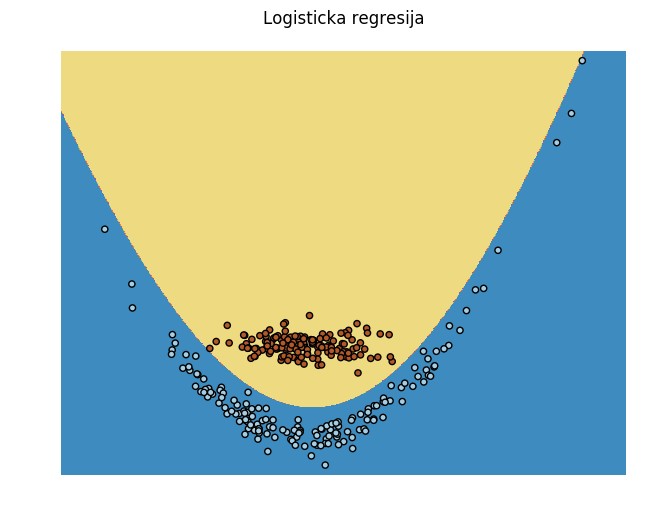

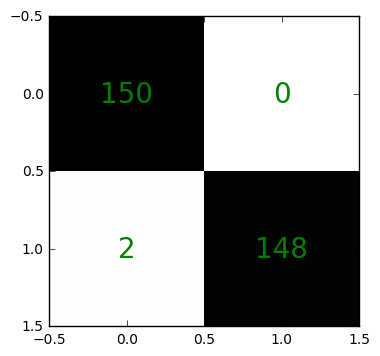

In [16]:
plotDecisionCurve(logRegress, 'Logisticka regresija',polyTest,y_predictedRegress,True)
matrix=confusion_matrix(dataTest[:,2],y_predictedRegress)
plot_confusion_matrix(matrix)

ParamEval=evaluateModel(matrix)
print "Tocnost: ", ParamEval[0], "%"
print "Ucestalost pogresne klasifikacije: " , ParamEval[1], "%"
print "Preciznost: ",  ParamEval[2], "%"
print "Odziv: ",  ParamEval[3], "%"
print "Specificnost: ",  ParamEval[4], "%"

Usporedbom pokazatelja kakvoće MLP-a i logističke regresije dolazimo do zaključka da logistička regresija bolje klasificira podatke nego MLP. Prema dodatnim pokazateljima u svim pogledima logistička regresija je bolja opcija od MLP-a. Do problema dolazi ukoliko pogledamo dimenzije TestS/TrainS skupa i polyTest/polyTrain skupa.

In [17]:
print 'Dimenzije TrainS skupa: ', np.shape(TrainS)
print 'Dimenzije polyTrain skupa:', np.shape(polyTrain)

Dimenzije TrainS skupa:  (700L, 2L)
Dimenzije polyTrain skupa: (700L, 5L)


Kako bi optimizirali MLP klasifikator potrebno je skalirati podatke. Skaliranjem podataka ne mijenjamo dimenzije tih podataka, samo vrijednosti. Vidimo da za logističku regresiju nije moguće samo skalirati podatke kako bi dobili željenu točnost. Prilagodbom podataka dodavanjem polinomskih svojstava vidimo da smo dodali 3 dodatna stupca gdje svaki ima 700 članova. Vrlo često ulazni skupovi su veći od 2 stupca odnosno potrebno ih je odvojiti s krivuljom reda 3 i više. Ukoliko bi koristili logičku regresiju ona bi postala spora i neefikasna na višim redovima pošto i trening i test skup moraju imati polinomne osobine.